# 一、 项目介绍与说明
本项目参考于和鲸社区

作者: Shelter

来源: https://www.heywhale.com/mw/project/637ae5ac53342897d9864cde/content

## 数据信息

In [1]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_csv('douyin_dataset.csv')
df.head()

,Unnamed: 0,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,duration_time,real_time,H,date
0,3,15692,109.0,691661,18212,213.0,0,0,0,11513.0,10,2019-10-28 21:55:10,21,2019-10-28
1,5,44071,80.0,1243212,34500,68.0,0,0,0,1274.0,9,2019-10-21 22:27:03,22,2019-10-21
2,16,10902,202.0,3845855,634066,113.0,0,0,0,762.0,10,2019-10-26 00:38:51,0,2019-10-26
3,19,25300,21.0,3929579,214923,330.0,0,0,0,2332.0,15,2019-10-25 20:36:25,20,2019-10-25
4,24,3656,138.0,2572269,182680,80.0,0,0,0,238.0,9,2019-10-21 20:46:29,20,2019-10-21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737312 entries, 0 to 1737311
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   uid            int64  
 2   user_city      float64
 3   item_id        int64  
 4   author_id      int64  
 5   item_city      float64
 6   channel        int64  
 7   finish         int64  
 8   like           int64  
 9   music_id       float64
 10  duration_time  int64  
 11  real_time      object 
 12  H              int64  
 13  date           object 
dtypes: float64(3), int64(9), object(2)
memory usage: 185.6+ MB


**字段说明**

|字段名|释义|字段名|释义|字段名|释义|
|:---|:---|:---|:---|:---|:---|
|uid|用户id|user_city|用户城市|item_id|作品id|
|author_id|作者id|item_city|作者城市|channel|作品频道|
|finish|是否看完|like|是否点赞|music_id|音乐id|
|duration_time|作品时长|real_time|具体发布时间|H、date|时、天(发布)|


# 二、 数据简单处理

In [4]:
#删除无效字段
del df['Unnamed: 0']

In [5]:
#缺失值检查
df.isnull().sum() 

uid              0
user_city        0
item_id          0
author_id        0
item_city        0
channel          0
finish           0
like             0
music_id         0
duration_time    0
real_time        0
H                0
date             0
dtype: int64

In [6]:
#重复值检查
df.duplicated().sum()

0

# 三、 特征指标构建

**用户指标（拟定）**

浏览量、点赞量、完整观看数、观看作品数、观看作者数、观看作品平均时长、bgm收听数、所在过的城市数、观看作品的所在城市数

**作者指标（拟定）**

活跃度、所在过的城市数、发布作品天数、bgm使用数、所获总浏览量、所获总点赞数、总完播量、总作品数、作品平均时长

**作品指标（拟定）**

点赞量、浏览量、bgm、发布城市

## 特征指标统计

### 1. 用户特征统计

In [36]:
user_df = pd.DataFrame()
user_df['uid'] = df['uid'].unique()
user_df.set_index('uid',inplace=True)
user_df['浏览量']=df.groupby('uid')['like'].count()
user_df['点赞量']=df.groupby('uid')['like'].sum()
user_df['完整观看数'] = df.groupby('uid')['finish'].sum()
user_df['观看作者数'] = df.groupby('uid')['author_id'].nunique()
user_df['观看作品数'] = df.groupby('uid')['item_id'].nunique()
user_df['bgm收听数'] = df.groupby('uid')['music_id'].nunique()
user_df['观看作品平均时长'] = df.groupby('uid')['duration_time'].mean()
user_df['所在过的城市数'] = df.groupby('uid')['user_city'].nunique()
user_df['观看作品的所在城市数'] = df.groupby('uid')['item_city'].nunique()
user_df.to_csv('user_data.csv',encoding='utf-8-sig')
user_df.head()

### 2. 作者特征统计

In [43]:
author_df = pd.DataFrame()
author_df['author_id'] = df['author_id'].unique()
author_df.set_index('author_id',inplace=True)
author_df['所获总浏览量'] = df.groupby('author_id')['like'].count()
author_df['所获总点赞量'] = df.groupby('author_id')['like'].sum()
author_df['总完播量'] = df.groupby('author_id')['finish'].sum()
author_df['总作品数'] = df.groupby('author_id')['item_id'].nunique()
# 计算每个作品的平均时长（按author和item分组）
item_time = df.groupby(['author_id', 'item_id'])['duration_time'].mean().reset_index()
author_df['作品平均时长'] = item_time.groupby('author_id')['duration_time'].mean()
author_df['bgm使用数'] = df.groupby('author_id')['music_id'].nunique()
author_df['发布作品天数']=df.groupby('author_id')['date'].nunique()
author_df['所在过的城市数'] = df.groupby('author_id')['item_city'].nunique()
author_df.to_csv('author_data.csv', encoding='utf_8_sig')
author_df.head()

,所获总浏览量,所获总点赞量,总完播量,总作品数,作品平均时长,bgm使用数,发布作品天数,所在过的城市数
author_id,,,,,,,,
18212,123,1,54,16,9.312500,16,16,1
34500,20,0,8,11,12.545455,3,7,1
634066,97,0,59,2,8.000000,2,2,1
214923,23,0,10,8,9.500000,6,5,1
182680,11,0,7,5,9.200000,4,5,4


### 3. 作品特征统计

In [44]:
item_df = pd.DataFrame()
item_df['item_id'] = df['item_id'].unique()
item_df.set_index('item_id',inplace=True)
item_df['浏览量'] = df.groupby('item_id')['like'].count()
item_df['点赞量'] = df.groupby('item_id')['like'].sum()
item_df['发布城市'] = df.groupby('item_id')['item_city'].mean()
item_df['bgm'] = df.groupby('item_id')['music_id'].mean()
item_df.to_csv('item_data.csv',encoding='utf_8_sig')
item_df.head()

,浏览量,点赞量,发布城市,bgm
item_id,,,,
691661,38,0,213.0,11513.0
1243212,1,0,68.0,1274.0
3845855,95,0,113.0,762.0
3929579,3,0,330.0,2332.0
2572269,4,0,80.0,238.0


# 三、 数据可视化

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

## 1. 用户数据可视化

In [4]:
user_df = pd.read_csv('user_data.csv')
user_df.describe()

,uid,浏览量,点赞量,完整观看数,观看作者数,观看作品数,bgm收听数,观看作品平均时长,所在过的城市数,观看作品的所在城市数
count,59232.000000,59232.000000,59232.000000,59232.000000,59232.000000,59232.000000,59232.000000,59232.000000,59232.000000,59232.000000
mean,32337.581004,29.330632,0.283175,11.759995,28.337942,29.330311,25.611392,11.331897,1.155372,20.322680
std,19746.364788,49.589417,2.240180,16.970857,46.642395,49.588854,38.459314,3.301528,0.529922,24.595297
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,15096.750000,4.000000,0.000000,2.000000,4.000000,4.000000,4.000000,9.705882,1.000000,4.000000
50%,31813.500000,12.000000,0.000000,6.000000,12.000000,12.000000,12.000000,10.833333,1.000000,11.000000
75%,48472.250000,34.000000,0.000000,15.000000,33.000000,34.000000,31.000000,12.088944,1.000000,28.000000
max,70710.000000,1951.000000,183.000000,284.000000,1740.000000,1951.000000,1197.000000,42.000000,10.000000,279.000000


In [5]:
#定义浏览量区间
bins = [0,10,50,100,200,500,1000,float('inf')]
labels=[
    '0-10',
    '11-50',
    '51-100',
    '101-200',
    '201-500', 
    '501-1000', 
    '>1000'
]    
# 按区间分组统计
view_group = pd.cut(user_df['浏览量'],bins=bins,labels=labels,right=True)
like_group = pd.cut(user_df['点赞量'],bins=bins,labels=labels,right=True)
group_counts = view_group.value_counts().sort_index()
like_counts = like_group.value_counts().sort_index()
group_counts
like_counts

点赞量
0-10        4836
11-50        262
51-100        17
101-200        3
201-500        0
501-1000       0
>1000          0
Name: count, dtype: int64

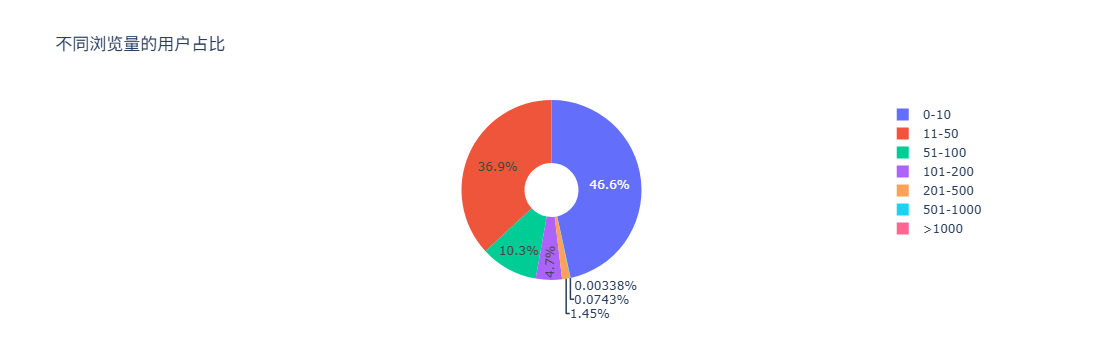

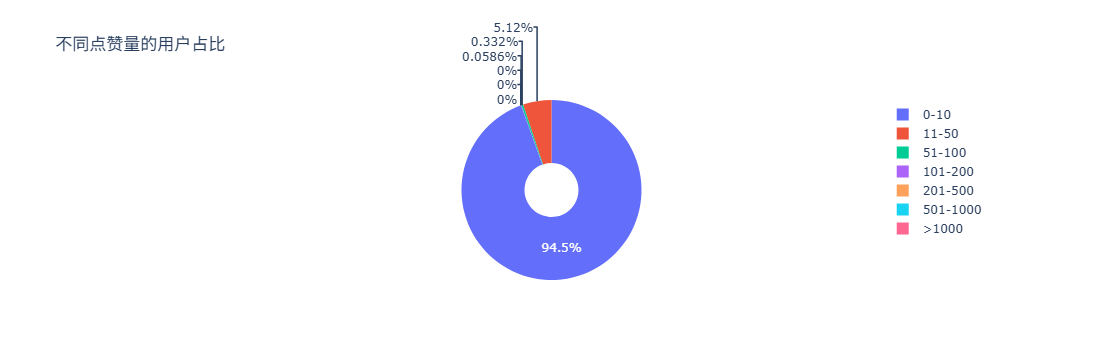

In [22]:
view_fig = px.pie(
    names=group_counts.index,
    values=group_counts,
    hole=0.3,
    title="不同浏览量的用户占比"
)
like_fig = px.pie(
    names=like_counts.index,
    values=like_counts,
    hole=0.3,
    title="不同点赞量的用户占比"
)
view_fig.show()
like_fig.show()

In [9]:
time_bins = [min(user_df['观看作品平均时长']),10,12,15,max(user_df['观看作品平均时长'])]
time_group = pd.cut(user_df['观看作品平均时长'],bins=time_bins,right=True)
time_counts = time_group.value_counts().sort_index()
list(time_counts.values)
time_counts

观看作品平均时长
(2.0, 10.0]     20371
(10.0, 12.0]    23565
(12.0, 15.0]    10914
(15.0, 42.0]     4340
Name: count, dtype: int64

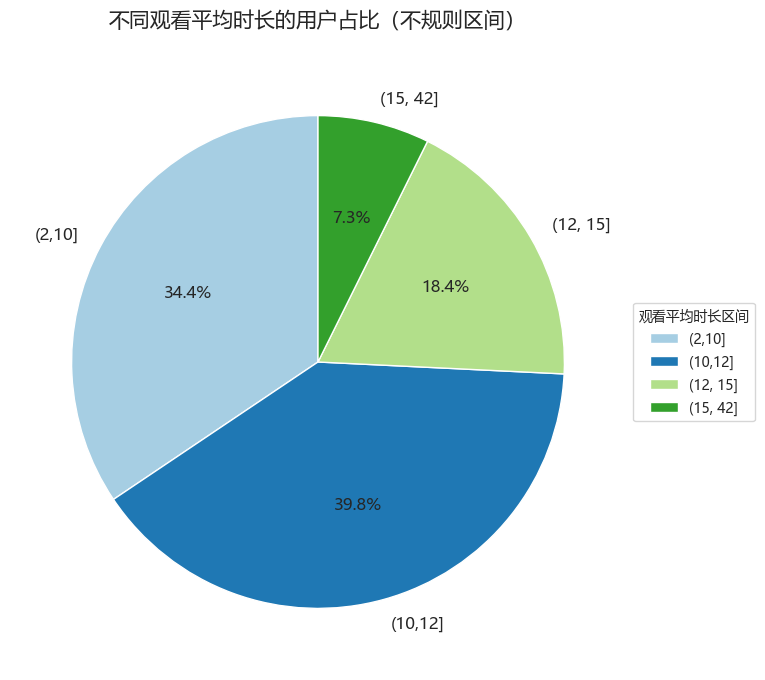

In [23]:
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(
    time_counts,
    labels=['(2,10]','(10,12]','(12, 15]','(15, 42]'],
    autopct='%.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,  # 使用渐变色
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, 
    textprops={'fontsize': 12}
)

plt.title('不同观看平均时长的用户占比（不规则区间）', fontsize=15, pad=20)
plt.legend(
    title="观看平均时长区间",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

## 2. 作者数据可视化

In [46]:
author_df = pd.read_csv('author_data.csv')
author_df.describe()

,author_id,所获总浏览量,所获总点赞量,总完播量,总作品数,作品平均时长,bgm使用数,发布作品天数,所在过的城市数
count,208187.000000,208187.000000,208187.000000,208187.000000,208187.000000,208187.000000,208187.000000,208187.000000,208187.000000
mean,334966.482216,8.344959,0.080567,3.345877,2.158992,10.652795,1.942475,1.926806,1.044787
std,250617.748498,38.481736,0.536451,16.886125,3.504402,5.704989,2.694698,2.385101,0.285560
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,115472.000000,1.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1.000000
50%,267541.000000,1.000000,0.000000,0.000000,1.000000,9.750000,1.000000,1.000000,1.000000
75%,551691.500000,4.000000,0.000000,2.000000,2.000000,10.000000,2.000000,2.000000,1.000000
max,850307.000000,2648.000000,36.000000,1111.000000,152.000000,620.000000,98.000000,39.000000,19.000000


**作者活跃情况分析**

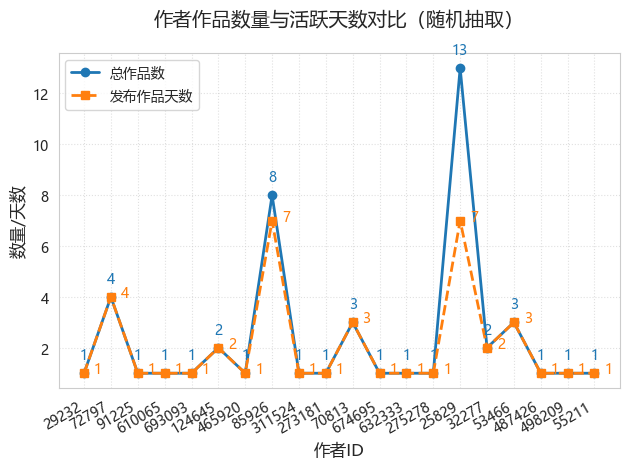

,author_id,总作品数,发布作品天数
79473,29232,1,1
158896,72797,4,4
61994,91225,1,1
140178,610065,1,1
148605,693093,1,1
119333,124645,2,2
154773,465920,1,1
30302,85926,8,7
81346,311524,1,1
198538,273181,1,1


In [84]:
random_df = author_df[['author_id', '总作品数', '发布作品天数']].sample(20)

x = np.arange(len(random_df))
y1 = random_df['总作品数']
y2 = random_df['发布作品天数']

# 绘制第一条折线（总作品数）
plt.plot(
    x, 
    y1, 
    color='#1f77b4',  # 蓝色
    marker='o',       # 圆圈标记
    linestyle='-',    # 实线
    linewidth=2,
    label='总作品数'
)
for xi, yi in zip(x, y1):
    plt.annotate(
        f'{yi}',
        (xi, yi),
        xytext=(0, 10),  # 标签偏移量
        textcoords='offset points',
        ha='center',
        color='#1f77b4'
    )
# 绘制第二条折线（发布作品天数）
plt.plot(
    x,
    y2, 
    color='#ff7f0e',  # 橙色
    marker='s',       # 方形标记
    linestyle='--',   # 虚线
    linewidth=2,
    label='发布作品天数'
)
for xi,yi in zip(x,y2):
    plt.annotate(
        f'{yi}',
        (xi,yi), 
        xytext=(10, 0),  # 标签偏移量
        textcoords='offset points',
        ha='center',
        color='#ff7f0e'
    )
# 添加图表元素
plt.title('作者作品数量与活跃天数对比（随机抽取）', fontsize=14, pad=20)
plt.xlabel('作者ID', fontsize=12)
plt.ylabel('数量/天数', fontsize=12)
plt.legend(loc='upper left', fontsize=10)  # 图例
plt.grid(True, linestyle=':', alpha=0.6)   # 网格线

plt.xticks(x,random_df['author_id'])

# 自动旋转X轴标签（防止重叠）
plt.gcf().autofmt_xdate()

# 显示图表
plt.tight_layout()
plt.show()
random_df

## 3. 作品数据可视化

In [92]:
item_df = pd.read_csv('item_data.csv')
item_df.describe()

,item_id,浏览量,点赞量,发布城市,bgm
count,4.494720e+05,449472.000000,449472.000000,449472.000000,449472.000000
mean,1.696470e+06,3.865229,0.037317,92.526098,6113.790414
std,1.250878e+06,17.718806,0.289749,81.204436,12329.790826
min,0.000000e+00,1.000000,0.000000,0.000000,1.000000
25%,6.334170e+05,1.000000,0.000000,29.000000,220.000000
50%,1.386752e+06,1.000000,0.000000,69.000000,1190.000000
75%,2.884243e+06,2.000000,0.000000,139.000000,5544.000000
max,4.122678e+06,1506.000000,35.000000,460.000000,89776.000000


**作品每日发布量**

In [101]:
item_counts = df.groupby('date')['item_id'].count()
item_counts.index=pd.to_datetime(data.index)

<class 'pandas.core.series.Series'>
Index: 40 entries, 2019-09-21 to 2019-10-30
Series name: item_id
Non-Null Count  Dtype
--------------  -----
40 non-null     int64
dtypes: int64(1)
memory usage: 640.0+ bytes


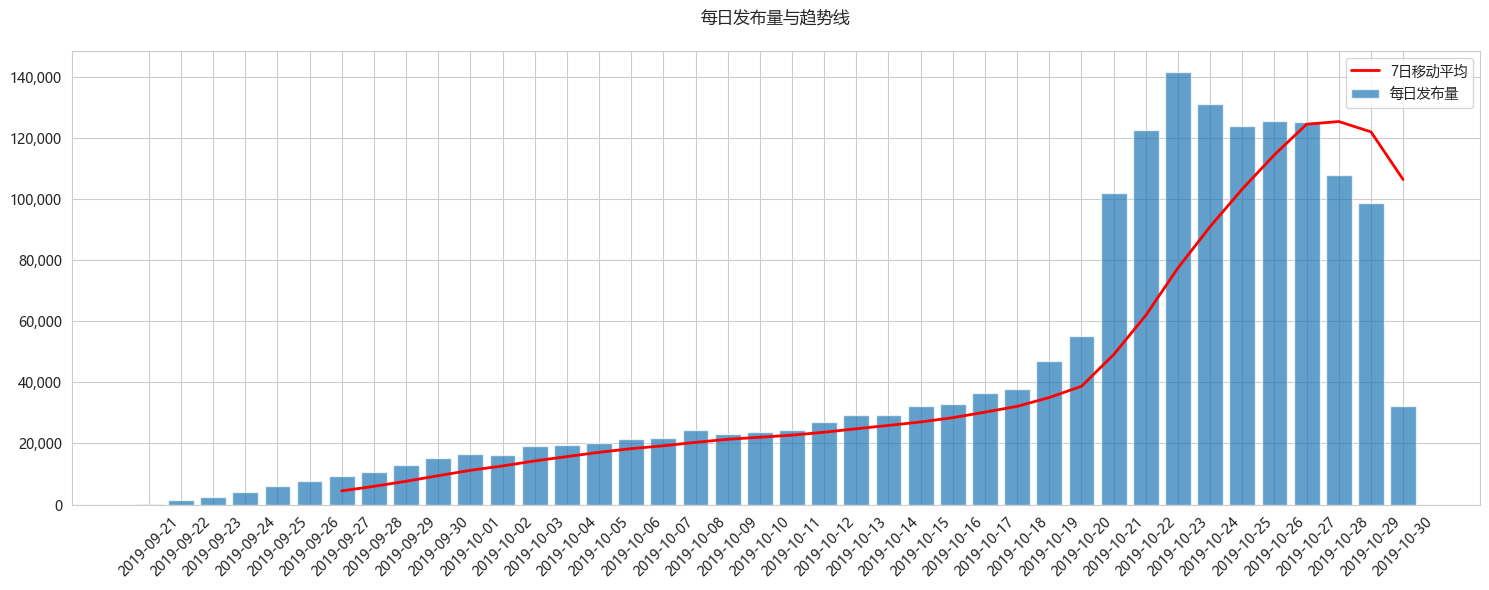

In [102]:
plt.figure(figsize=(15, 6))

# 柱状图
bars = plt.bar(item_counts.index, item_counts.values, 
              width=0.8, 
              color='#1f77b4',
              alpha=0.7,
              label='每日发布量')

# 7日移动平均线
ma7 = item_counts.rolling(7).mean()
plt.plot(item_counts.index, ma7, 
         color='red', 
         linewidth=2,
         label='7日移动平均')


plt.title('每日发布量与趋势线', pad=20)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.legend()
plt.tight_layout()
plt.show()